In [1]:
# importing the required libraries
import numpy as np
from keras.datasets import cifar10
from keras.datasets import mnist
from keras.models import load_model
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [2]:
def load_dataset(name):
    # load dataset
    (trainX, trainY), (testX, testY) = name.load_data()
    # shape of dataset
    train_shape, test_shape = [trainX.shape, trainY.shape], [testX.shape, testY.shape]
    num_classes = len(np.unique(trainY))
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY, train_shape, test_shape

# if personal dataset is being used
# dataset is a dictionary with keys : train, test and values : data, labels
def dataset_personal(dataset):
    trainX, trainY, testX, testY = dataset['train']['data'], dataset['train']['labels'], dataset['test']['data'], dataset['test']['labels']
    train_shape, test_shape = [trainX.shape, trainY.shape], [testX.shape, testY.shape]
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY, train_shape, test_shape

# function to split dataset into train and test
def split_dataset(name, type):
    if type == 'keras':
        trainX, trainY, testX, testY, train_shape, test_shape = load_dataset(name)
    elif type == 'personal':
        trainX, trainY, testX, testY, train_shape, test_shape = dataset_personal(name)

    return trainX, trainY, testX, testY, train_shape, test_shape

In [3]:
# prepare pixel data for modeling
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

In [9]:
# evaluating the model for cifar10 dataset
# you can change the dataset name to evaluate the model on other datasets
# while using the split_dataset function change the type to 'personal' if using personal dataset
def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY, train_shape, _ = split_dataset(cifar10, 'keras')
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # load model
    model = load_model('/content/cnn_model.keras')
    # evaluate model on test dataset
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> Accuracy: %.3f' % (acc * 100.0))
    return testX, testY

In [10]:
testX, testY = run_test_harness()

> Accuracy: 82.830


In [11]:
# names of the classes
names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [26]:
import matplotlib.pyplot as plt
# plot 10 images from the test set and their predicted labels
np.random.seed(42)
def prediction(testX, testY):
    images = []
    labels = []
    for i in range(10):
        # select a random image
        index = np.random.randint(0, 1000)
        images.append(testX[index])
        labels.append(testY[index])

    images = np.array(images)
    labels = np.array(labels)
    # load model
    model = load_model('/content/cnn_model.keras')
    # predict the class
    result = model.predict(images)
    result_classes = result.argmax(axis=-1)
    # plot the images and their predicted labels
    for i in range(10):
        plt.subplot(2, 5, i+1)
        plt.imshow(images[i])
        plt.title(names[result_classes[i]])
        plt.xticks([])
        plt.yticks([])
    plt.show()

1/1 [==============================] - 0s 119ms/step


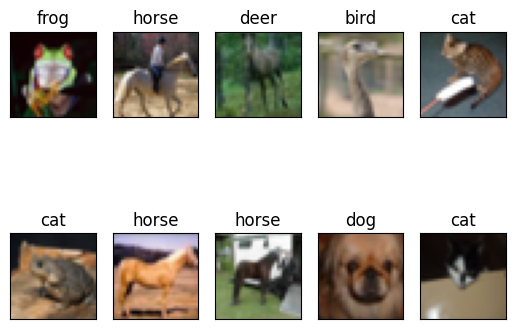

In [27]:
prediction(testX, testY)

In [38]:
# if you want to predict on your own image for cifar10 dataset

names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# load the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(32, 32))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 32, 32, 3)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

# load an image and predict the class

def predict_class(image_path):
    # load the image
    img = load_image(image_path)
    # load model
    model = load_model('/content/cnn_model.keras')
    # predict the class
    # predict the class
    result = model.predict(img)
    result_classes = result.argmax(axis=-1)
    print(names[result_classes[0]])

In [33]:
def output(image, image_path):
    # plot image
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.show()
    # predict the class
    predict_class(image_path)

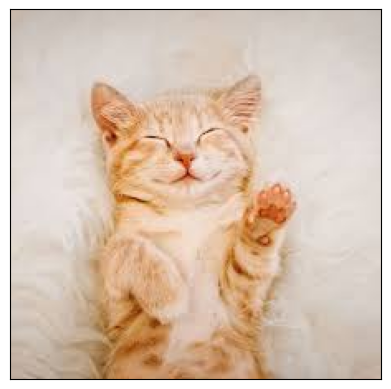

1/1 [==============================] - 0s 183ms/step
cat


In [40]:
from PIL import Image
image = Image.open('/content/cat_test.jpg')
output(image, '/content/cat_test.jpg')